IA & Data science (LU3IN0226) -- 2023-2024
--------
*&copy; Equipe pédagogique: Téo Guichoux, Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# TD-TME11: projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Oulfid Hamza - Lahbib Yassin

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et **un seul rendu sur un des deux comptes Moodle doit être fait**.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**Ce TD-TME11 est prévu pour être fait lors de la dernière séance de TD-TME11 de votre groupe.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *tme-11-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2024


## Date de remise 

Le travail doit être rendu (sur le site Moodle) avant le <font size="+1" color="RED"><b>vendredi 17 mai 2024, à 18h</b></font>
    

<b>Il n'y aura pas d'extension de la date de remise autorisée : <font size="+1" color="RED">aucun rendu ne sera accepté après 18h.</font></b>

<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

## Travail à faire

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

Appliquer les algorithmes d'apprentissage non supervisés vus en cours (CAH et k-moyennes) sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- *Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 21 mai 2024**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- tme-11/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.



In [3]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

import seaborn as sns
from random import sample

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : Pen-Based Recognition of Handwritten Digits

documentation: <a href="https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits" target="NEW">page UCI</a> (mais l'essentiel est donné ci-après).

Pour télécharger les données, la façon la plus simple est d'installer la librairie de l'UCI:

    pip install -U ucimlrepo

ensuite, on peut lancer la boîte suivante.

S'il n'est pas possible d'installer cette librairie, les données sont accessibles sur la page web citée ci-dessus (cliquer sur "Download" en haut et à droite de la page).

### Chargement des données

In [4]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
#list_available_datasets()

# import dataset
pen_dataset = fetch_ucirepo(id=81)

# access data
X = pen_dataset.data.features
y = pen_dataset.data.targets

# access metadata
print(pen_dataset.metadata.uci_id)
print(pen_dataset.metadata.num_instances)
print(pen_dataset.metadata.additional_info.summary)

# access variable info in tabular format
print(pen_dataset.variables)

81
10992
We create a digit database by collecting 250 samples from 44 writers. The samples written by 30 writers are used for training, cross-validation and writer dependent testing, and the digits written by the other 14 are used for writer independent testing. This database is also available in the UNIPEN format.

We use a WACOM PL-100V pressure sensitive tablet with an integrated LCD display and a cordless stylus. The input and display areas are located in the same place. Attached to the serial port of an Intel 486 based PC, it allows us to collect handwriting samples. The tablet sends $x$ and $y$ tablet coordinates and pressure level values of the pen at fixed time intervals (sampling rate) of 100 miliseconds. 

These writers are asked to write 250 digits in random order inside boxes of 500 by 500 tablet pixel resolution.  Subject are monitored only during the first entry screens. Each screen contains five boxes with the digits to be written displayed above. Subjects are told to wr

### Apprentissage non-supervisé

Pour ce sujet, vous considèrerez seulement les données de description (features X) sur lesquelles vous proposerez des expérimentations des algorithmes d'apprentissage non-supervisé vus en cours mettant en évidence des clusters et leur évaluation.

Ainsi, vous devrez:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).


   


## Conversion Pandas vers Numpy pour nos algorithmes

In [5]:
x_data = X.to_numpy()

In [6]:
len(X)

10992

# Echantillonnage en respectants la repartition des classes de notre Base de Données des données pour reduire les temps de calcule

In [7]:
def echantillon(ech, X, y):
    """
        Prend en parametre le pourcentage d'individu dans la Base de Donnée 
        ech -> Pourcentage d'echantillon de chaque classe
        X : dataFram description
        y : dataFram labels
        Hyp : 0< ech <= 1  
        
        Returns : 
            x_echantillon -> (dataFram) base de donnée reduit a ech pourcent de description
            y_echantillon -> (dataFram) label associé au description 
    """
    nombre_pris = [] #Liste disant cobien d'exemple prendre par label selon "ech"
    for i in range(len(np.unique(y))):
        nombre_pris.append(int(len(np.where(y['Class'] == i)[0])*ech))
        
    print("nombre_pris=",nombre_pris)

    X_echantillon = np.array([])
    Y_echantillon = np.array([])
    indices_selectionne = np.array([])

    for i in range(len(np.unique(y))):


        indx_y_i = np.where(y['Class'] == i)[0] #Les indexes qui ont leur label valant i
        

        indices_selectionne =  np.append( indices_selectionne, sample(list(indx_y_i),nombre_pris[i]) ) #On en choisi le nombre calculé plus haut dans nombre_pris
 
        
        
    X_echantillon = X.iloc[indices_selectionne]
    Y_echantillon = y.iloc[indices_selectionne]

    return X_echantillon, Y_echantillon

In [119]:
X_echantillon, Y_echantillon = echantillon(0.1,X,y)
X_echantillon

# Réindexer le DataFrame en partant de zéro -> Pour nos algos
X_echantillon_reset = X_echantillon.reset_index(drop=True)
Y_echantillon_reset = Y_echantillon.reset_index(drop=True)

nombre_pris= [114, 114, 114, 105, 114, 105, 105, 114, 105, 105]


In [120]:
X_echantillon_reset

Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0             36          52           0          50           6           6   
1              7          81           0          58          14           8   
2             49          83          11          70           0          24   
3             25          50          17          11          58           0   
4             48          73          27          86           0          48   
...          ...         ...         ...         ...         ...         ...   
1090          31          49          91          77          59         100   
1091          76          76          48         100           0          80   
1092          98          88          45         100          28          67   
1093          93         100          50          87         100          91   
1094         100          91          38         100          32          62   

      Attribute7  Attribute8  Attribute9  Attribute10  Attribute11  \
0             56           0          97           30          100   
1             67           0         100           42           91   
2             39           0          89           20          100   
3             90          27         100           65           80   
4              7           5          53            0           91   
...          ...         ...         ...          ...          ...   
1090           0          73          25           41          100   
1091          37          58         100           74           84   
1092          86          66         100           69          100   
1093          93          70          91           44           89   
1094          99          70          96           83           97   

      Attribute12  Attribute13  Attribute14  Attribute15  Attribute16  
0              76           58          100           24           68  
1              94           39          100           16           55  
2              62           69          100           35           79  
3              99           36          100            0           75  
4              27          100           71           66          100  
...           ...          ...          ...          ...          ...  
1090           57           71           36           37            0  
1091           57           46           29           19            0  
1092           31           61            0            0           11  
1093           18           57            1            0            0  
1094           40           69            1            0            0  

[1095 rows x 16 columns]

# Lancement K-Means plusieurs fois faisant varier k (Base Echantillon)

In [331]:
nb_lancement = 1 #Nombre de lancement K-Means pour chaque k

val_k = np.arange(3,15)

resultat_indx_XieBeni = [ [] for i in range(len(val_k)) ] #Stock les indice de Xie Beni de chaque lancement des KMeans
resultat_indx_Dunn = [ [] for i in range(len(val_k)) ] #Stock les indice de Dunn de chaque lancement des KMeans
resultat_affect = [ [] for i in range(len(val_k)) ] #Stock les partitions obtenus de chaque lancement des KMeans
time_Total = 0 #Temps total d'éxécution (en secondes)

L_intra = []



cpt = 0
for k in val_k:
    print("\n\t\tk=",k,"\t\t\n")


    
    
    for i in range(nb_lancement):
        time_Kmeans = 0
        time_Indx_XieB = 0
        time_Indx_Dunn = 0
        
        
        ########### Kmeans
        tic = time.time()
        les_centres, l_affectation = clust.kmoyennes(k, X_echantillon_reset, 0.05, 100,verbose=False)
        toc = time.time()
        
        time_Kmeans = toc - tic
        print("Temps d'éxécution de k-Moyennes:",time_Kmeans,"sec")
        
        
        ########### Index Xie Beni
        tic = time.time()
        indx_XieBeni = clust.index_Xie_Beni(les_centres, l_affectation, X)
        toc = time.time()
        
        time_Indx_XieB = toc - tic
        print("Temps d'éxécution calcul index XieBeni:",time_Indx_XieB,"sec")
        
        
        ########### Index Dunn
        tic = time.time()
        indx_Dunn = clust.index_Dunn(les_centres, l_affectation, X)
        toc = time.time()
        
        time_Indx_Dunn = toc - tic
        print("Temps d'éxécution calcul index Dunn:",time_Indx_Dunn,"sec")
        
        
        ########### Temps total
        time_Total += time_Indx_Dunn + time_Indx_XieB + time_Kmeans
        
        L_intra.append(clust.inertie_globale(X_echantillon_reset, l_affectation))
        
        
        
        
        print("Temps d'éxécution de k-Moyennes et Calcul des indexes: ",toc-tic,"sec")





        resultat_indx_XieBeni[cpt].append(indx_XieBeni)
        resultat_indx_Dunn[cpt].append(indx_Dunn)
        
        resultat_affect[cpt].append(l_affectation)
        
    cpt+= 1
    
    
    print("\n\t\t*$*$*$*$*$*$*$\n\nTemps d'éxécution de ",nb_lancement," k-Moyennes et Calcul des indexes :",time_Total,"sec")
    





		k= 3 		

Temps d'éxécution de k-Moyennes: 4.929608106613159 sec
dist_min= 120.2452441406852
Temps d'éxécution calcul index XieBeni: 0.004724979400634766 sec
Temps d'éxécution calcul index Dunn: 0.12088394165039062 sec
Temps d'éxécution de k-Moyennes et Calcul des indexes:  0.12088394165039062 sec

		*$*$*$*$*$*$*$

Temps d'éxécution de  1  k-Moyennes et Calcul des indexes : 5.055217027664185 sec

		k= 4 		

Temps d'éxécution de k-Moyennes: 11.56445598602295 sec
dist_min= 109.54244887787847
Temps d'éxécution calcul index XieBeni: 0.0034792423248291016 sec
Temps d'éxécution calcul index Dunn: 0.06481194496154785 sec
Temps d'éxécution de k-Moyennes et Calcul des indexes:  0.06481194496154785 sec

		*$*$*$*$*$*$*$

Temps d'éxécution de  1  k-Moyennes et Calcul des indexes : 16.68796420097351 sec

		k= 5 		

Temps d'éxécution de k-Moyennes: 3.4347310066223145 sec
dist_min= 97.11795613282361
Temps d'éxécution calcul index XieBeni: 0.0036411285400390625 sec
Temps d'éxécution calcul index D

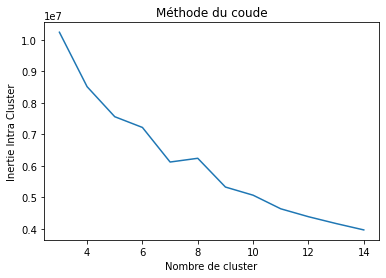

In [120]:
plt.plot(val_k, L_intra)

plt.xlabel("Nombre de cluster")
plt.ylabel("Inertie Intra Cluster")
plt.title("Méthode du coude")
plt.show()


# Une fois trouvée le bon nombre de cluster on lance l'algorithme k moyennes plusieurs fois avec le k trouvé (k=10)

In [154]:
nb_lancement = 10 #Nombre de lancement K-Means

#val_k = np.arange(3,26)
val_k = 10

resultat_indx_XieBeni = [] #Stock les indice de Xie Beni de chaque lancement des KMeans
resultat_indx_Dunn = [] #Stock les indice de Dunn de chaque lancement des KMeans
resultat_affect = [] #Stock les partitions obtenus de chaque lancement des KMeans
time_Total = 0 #Temps total d'éxécution (en secondes)

L_intra = []



cpt = 0    
for i in range(nb_lancement):
    time_Kmeans = 0
    time_Indx_XieB = 0
    time_Indx_Dunn = 0


    ########### Kmeans
    tic = time.time()
    les_centres, l_affectation = clust.kmoyennes(val_k, X_echantillon_reset, 0.05, 100,verbose=False)
    toc = time.time()

    time_Kmeans = toc - tic
    print("Temps d'éxécution de k-Moyennes:",time_Kmeans,"sec")


    ########### Index Xie Beni
    tic = time.time()
    indx_XieBeni = clust.index_Xie_Beni(les_centres, l_affectation, X)
    toc = time.time()

    time_Indx_XieB = toc - tic
    print("Temps d'éxécution calcul index XieBeni:",time_Indx_XieB,"sec")


    ########### Index Dunn
    tic = time.time()
    indx_Dunn = clust.index_Dunn(les_centres, l_affectation, X)
    toc = time.time()

    time_Indx_Dunn = toc - tic
    print("Temps d'éxécution calcul index Dunn:",time_Indx_Dunn,"sec")


    ########### Temps total
    time_Total += time_Indx_Dunn + time_Indx_XieB + time_Kmeans

    L_intra.append(clust.inertie_globale(X_echantillon_reset, l_affectation))




    print("Temps d'éxécution de k-Moyennes et Calcul des indexes: ",toc-tic,"sec")





    resultat_indx_XieBeni.append(indx_XieBeni)
    resultat_indx_Dunn.append(indx_Dunn)

    resultat_affect.append(l_affectation)

cpt+= 1


print("\n\t\t*$*$*$*$*$*$*$\n\nTemps d'éxécution de ",nb_lancement," k-Moyennes et Calcul des indexes :",time_Total,"sec")





Temps d'éxécution de k-Moyennes: 6.285242080688477 sec
dist_min= 71.55471371143757
Temps d'éxécution calcul index XieBeni: 0.00944209098815918 sec
Temps d'éxécution calcul index Dunn: 0.0475311279296875 sec
Temps d'éxécution de k-Moyennes et Calcul des indexes:  0.0475311279296875 sec
Temps d'éxécution de k-Moyennes: 3.828760862350464 sec
dist_min= 68.354203922561
Temps d'éxécution calcul index XieBeni: 0.00832986831665039 sec
Temps d'éxécution calcul index Dunn: 0.015500068664550781 sec
Temps d'éxécution de k-Moyennes et Calcul des indexes:  0.015500068664550781 sec
Temps d'éxécution de k-Moyennes: 5.635722875595093 sec
dist_min= 66.77986325857758
Temps d'éxécution calcul index XieBeni: 0.007028102874755859 sec
Temps d'éxécution calcul index Dunn: 0.02318596839904785 sec
Temps d'éxécution de k-Moyennes et Calcul des indexes:  0.02318596839904785 sec
Temps d'éxécution de k-Moyennes: 7.3914618492126465 sec
dist_min= 80.42723577741425
Temps d'éxécution calcul index XieBeni: 0.01030802726

# Nb: Faire courbe index Dunn et Xie Beni

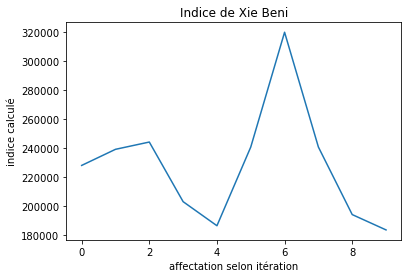

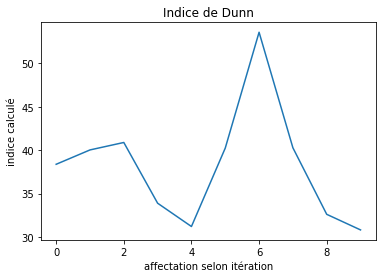

In [155]:
plt.plot(np.arange(0,10),resultat_indx_XieBeni)
plt.xlabel("affectation selon itération")
plt.ylabel("indice calculé")
plt.title("Indice de Xie Beni")

plt.show()



plt.plot(np.arange(0,10),resultat_indx_Dunn)
plt.xlabel("affectation selon itération")
plt.ylabel("indice calculé")
plt.title("Indice de Dunn")

plt.show()

In [27]:
#Affectation garder selon le calcul des index
affectation = resultat_affect[4]

On associe a chaque index de la base de donnée son cluster associé par notre clustering

In [28]:
y_clust_echantillon = np.zeros(len(X_echantillon_reset))
for label in affectation:
    y_clust_echantillon[l_affectation[label]] = label

In [29]:
len(np.where(y_clust_echantillon==0)[0])

125

In [49]:
len(np.where(y_clust_echantillon==6)[0])

239

## ACP

val propres: [50357573.30403763  4448712.32799651] indices: [0 1]


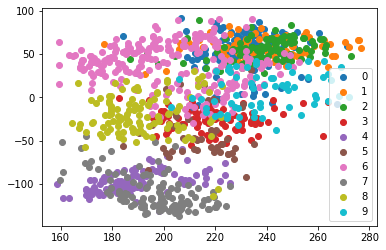

In [30]:
Xu = X_echantillon_reset
Yu = y_clust_echantillon


# 1) calcul des vecteurs propres
lam, V = np.linalg.eig(Xu.T @ Xu) 

indices_tries = np.argsort(lam)
indices_max = indices_tries[-2:] # On prend les deux indices correspondant aux valeur propre les plus grandes
indices_max = np.flip(indices_max) #Pour remmetre les indices séléctionner dans l'ordre


val_propres = lam[indices_max] #tableau des deux valeurs prorpres les plus grandes



# 2) affichage (print)
print("val propres:", val_propres, "indices:", indices_max)



# 3) tri et sélection des 2 vecteurs associés aux 2 plus grandes valeurs propres 
vecteur_propre = []
vecteur_propre.append(V[:,indices_max[0]]) #vecteur propre associé à la val propre d'indice "indices_max[0]"
vecteur_propre.append(V[:,indices_max[1]]) #vecteur propre associé à la val propre d'indice "indices_max[1]"  
#print(vecteur_propre)


# 4) affichage (plot) avec un code couleur pour les classes
labels = np.unique(Yu)

for label in labels :
    plt.scatter(( Xu[Yu==label] @ vecteur_propre[0]),Xu[Yu==label] @ vecteur_propre[1])
# ####################################
plt.legend(np.arange(10))
plt.show()




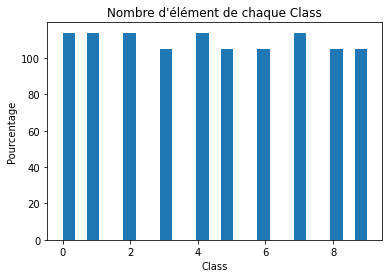

In [121]:
plt.hist(Y_echantillon_reset['Class'], bins=25)
plt.title("Nombre d'élément de chaque Class")
plt.xlabel("Class")
plt.ylabel("Pourcentage")
plt.show()

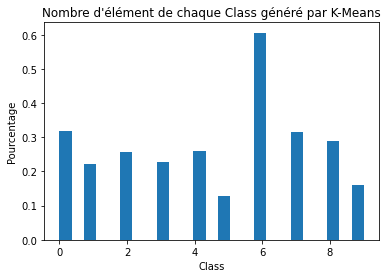

In [122]:
plt.hist(y_clust_echantillon, bins=25, density=True)
plt.title("Nombre d'élément de chaque Class généré par K-Means")
plt.xlabel("Class")
plt.ylabel("Pourcentage")
plt.show()

Notre clustering répartie les labels trouvé equitablement sauf pour le label 6 où il en a trouvé le double

In [ ]:
plt.hist(y_clust, bins=25)
plt.title("Nombre d'élément de chaque Class généré par K-Means")
plt.xlabel("Class")
plt.ylabel("Cardinal")
plt.show()

In [301]:
np.unique(y_clust_echantillon.astype(int))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### dictionnaire dont chaque clé est un cluster, pour chaque clé on calcule le nombre de descriptions appartenant réellement à chaque cluster réelle

In [130]:
def nombre_labels_real_diff(l_affectation, y):
    """ 
        l_affectation est le dictionnaire d'affectation généré par le clustering
        y est le vecteur de label réelle des donnée
        
        Retourne le nombre de fois que chaque label(réelle) apparait dans un cluster
    """
    n = len(np.unique(y))
    dict_nb_label = dict()
    print(n)
    
    for i in range(n) :
        dict_nb_label[i] = [ 0 for j in range(n) ]
    #print(l_affectation)
    
    for label in l_affectation:
        for desc in l_affectation[label]: 
            dict_nb_label[label][y[desc]] += 1
    
    return dict_nb_label
            
        
dico_repartition = nombre_labels_real_diff(affectation, Y_echantillon_reset['Class'])
dico_repartition

10


{0: [0, 8, 0, 102, 0, 23, 0, 0, 1, 17],
 1: [0, 3, 0, 0, 2, 7, 0, 0, 2, 65],
 2: [0, 67, 3, 2, 0, 0, 0, 14, 1, 11],
 3: [0, 0, 0, 0, 0, 0, 0, 9, 9, 0],
 4: [0, 0, 0, 0, 109, 0, 0, 0, 0, 9],
 5: [2, 1, 0, 0, 3, 3, 105, 0, 0, 0],
 6: [0, 0, 0, 0, 0, 71, 0, 0, 26, 0],
 7: [110, 0, 0, 0, 0, 0, 0, 0, 17, 2],
 8: [2, 0, 0, 0, 0, 1, 0, 0, 48, 0],
 9: [0, 35, 111, 1, 0, 0, 0, 91, 1, 1]}

### On nomme le cluster par le label le plus présent dans le cluster

In [127]:
clust_pred = {}

i = 0
for key in dico_repartition:
    new_classe = np.argmax(dico_repartition[key])

    if new_classe in clust_pred:
        for i in range(len(clust_pred[new_classe])):
            clust_pred[new_classe][i] += dico_repartition[key][i] 
        
    else:
        clust_pred[new_classe] = dico_repartition[key]
    i+= 1
    
clust_pred

{3: [0, 8, 0, 102, 0, 23, 0, 0, 1, 17],
 9: [0, 3, 0, 0, 2, 7, 0, 0, 2, 65],
 1: [0, 67, 3, 2, 0, 0, 0, 14, 1, 11],
 7: [0, 0, 0, 0, 0, 0, 0, 9, 9, 0],
 4: [0, 0, 0, 0, 109, 0, 0, 0, 0, 9],
 6: [2, 1, 0, 0, 3, 3, 105, 0, 0, 0],
 5: [0, 0, 0, 0, 0, 71, 0, 0, 26, 0],
 0: [110, 0, 0, 0, 0, 0, 0, 0, 17, 2],
 8: [2, 0, 0, 0, 0, 1, 0, 0, 48, 0],
 2: [0, 35, 111, 1, 0, 0, 0, 91, 1, 1]}

### Pour chaque cluster trouvé on calcule l'entropie des classes réelles des exemples du cluster

Pour pouvoir calculer l'entropie de chaque cluster on associe un dictionnaire ou chaque clé qui est un label généré par notre classifieur est associé aux valeurs des labels de chaque exemple du cluster

In [153]:
calcul_entropie = {}

for key in clust_pred:
    calcul_entropie[key] = []
    for i in range(len(clust_pred[key])):
                       
        calcul_entropie[key].extend([i]*clust_pred[key][i])
    
#calcul_entropie

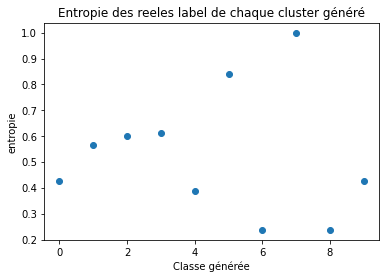

In [150]:
# entropie de chaque cluster trouvé
entropies = []
clus_name = []

for key in clust_pred :
    clus_name.append(key)
    entropies.append(classif.entropie(calcul_entropie[key]))
    
plt.scatter(clus_name, entropies )
plt.title("Entropie des reeles label de chaque cluster généré")
plt.xlabel("Classe générée")
plt.ylabel("entropie")
plt.show()
plt.show()

On remarque que dans tous les clusters il y a une classe réelle majoritaire différente entre chaque cluster

Le cluster 6 et 8 sont ceux qui ont possède un plus grand nombre d'exemples d'un meme label réel, par rapport aux autres label réel du clusters

Plus l'entropie est faible plus il ya un label réele qui se démarque des autres pour chaque cluster

### Base de donnée avec cluster trouvé associé

In [322]:
data_clustering = X_echantillon_reset.copy()
data_clustering['clust'] = y_clust_echantillon
data_clustering

Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0             11          82           6          41          28           0   
1             23         100           0          65           7          21   
2             47          82          17          73           0          34   
3             47          93           1          67           0          16   
4             89          77          57         100          19          73   
...          ...         ...         ...         ...         ...         ...   
1090          76          90          29          69          33         100   
1091          37          61           0          70          22          92   
1092          97          81          52         100           0          87   
1093          65          56         100          84          48         100   
1094          88         100          26          93          38          69   

      Attribute7  Attribute8  Attribute9  Attribute10  Attribute11  \
0             78           7         100           48           80   
1             44           0          89           16          100   
2             25           0          71            9          100   
3             53           0         100           32           95   
4              0          36          19            0           67   
...          ...         ...         ...          ...          ...   
1090          76          94          88           57          100   
1091          60         100          91           85          100   
1092          21          60          76           70          100   
1093           0          76          45           59           77   
1094         100          88          93           83           91   

      Attribute12  Attribute13  Attribute14  Attribute15  Attribute16  clust  
0              90           32          100            0           65    3.0  
1              56           72           91           28           96    3.0  
2              44           97           85           55          100    3.0  
3              81           42          100            7           62    3.0  
4               5          100           35           83           67    2.0  
...           ...          ...          ...          ...          ...    ...  
1090           20           62            0            0            4    1.0  
1091           57           91           28           80            0    5.0  
1092           47           74           12           23            0    1.0  
1093           61           42           30           19            0    4.0  
1094           51           57           22            0            0    1.0  

[1095 rows x 17 columns]

In [323]:
data_clustering[data_clustering['clust'] == 0].describe().iloc[[0,1,2]] 

Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
count  106.000000  106.000000  106.000000  106.000000  106.000000  106.000000   
mean    19.415094   88.349057   46.924528   99.301887   69.575472   78.594340   
std     34.587602    9.364617   18.427050    2.285231   31.197969   11.764173   

       Attribute7  Attribute8  Attribute9  Attribute10  Attribute11  \
count  106.000000  106.000000  106.000000   106.000000   106.000000   
mean    66.839623   41.433962   49.283019     6.160377    19.801887   
std     17.488574   12.574365   19.390108    11.146758    19.102441   

       Attribute12  Attribute13  Attribute14  Attribute15  Attribute16  clust  
count   106.000000   106.000000   106.000000   106.000000   106.000000  106.0  
mean     13.877358    35.971698    38.254717    92.367925    47.566038    0.0  
std      12.745646    16.550907    12.219470    15.264853    21.242822    0.0

## Affichage SeaBorn

/Users/yassinlahbib/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


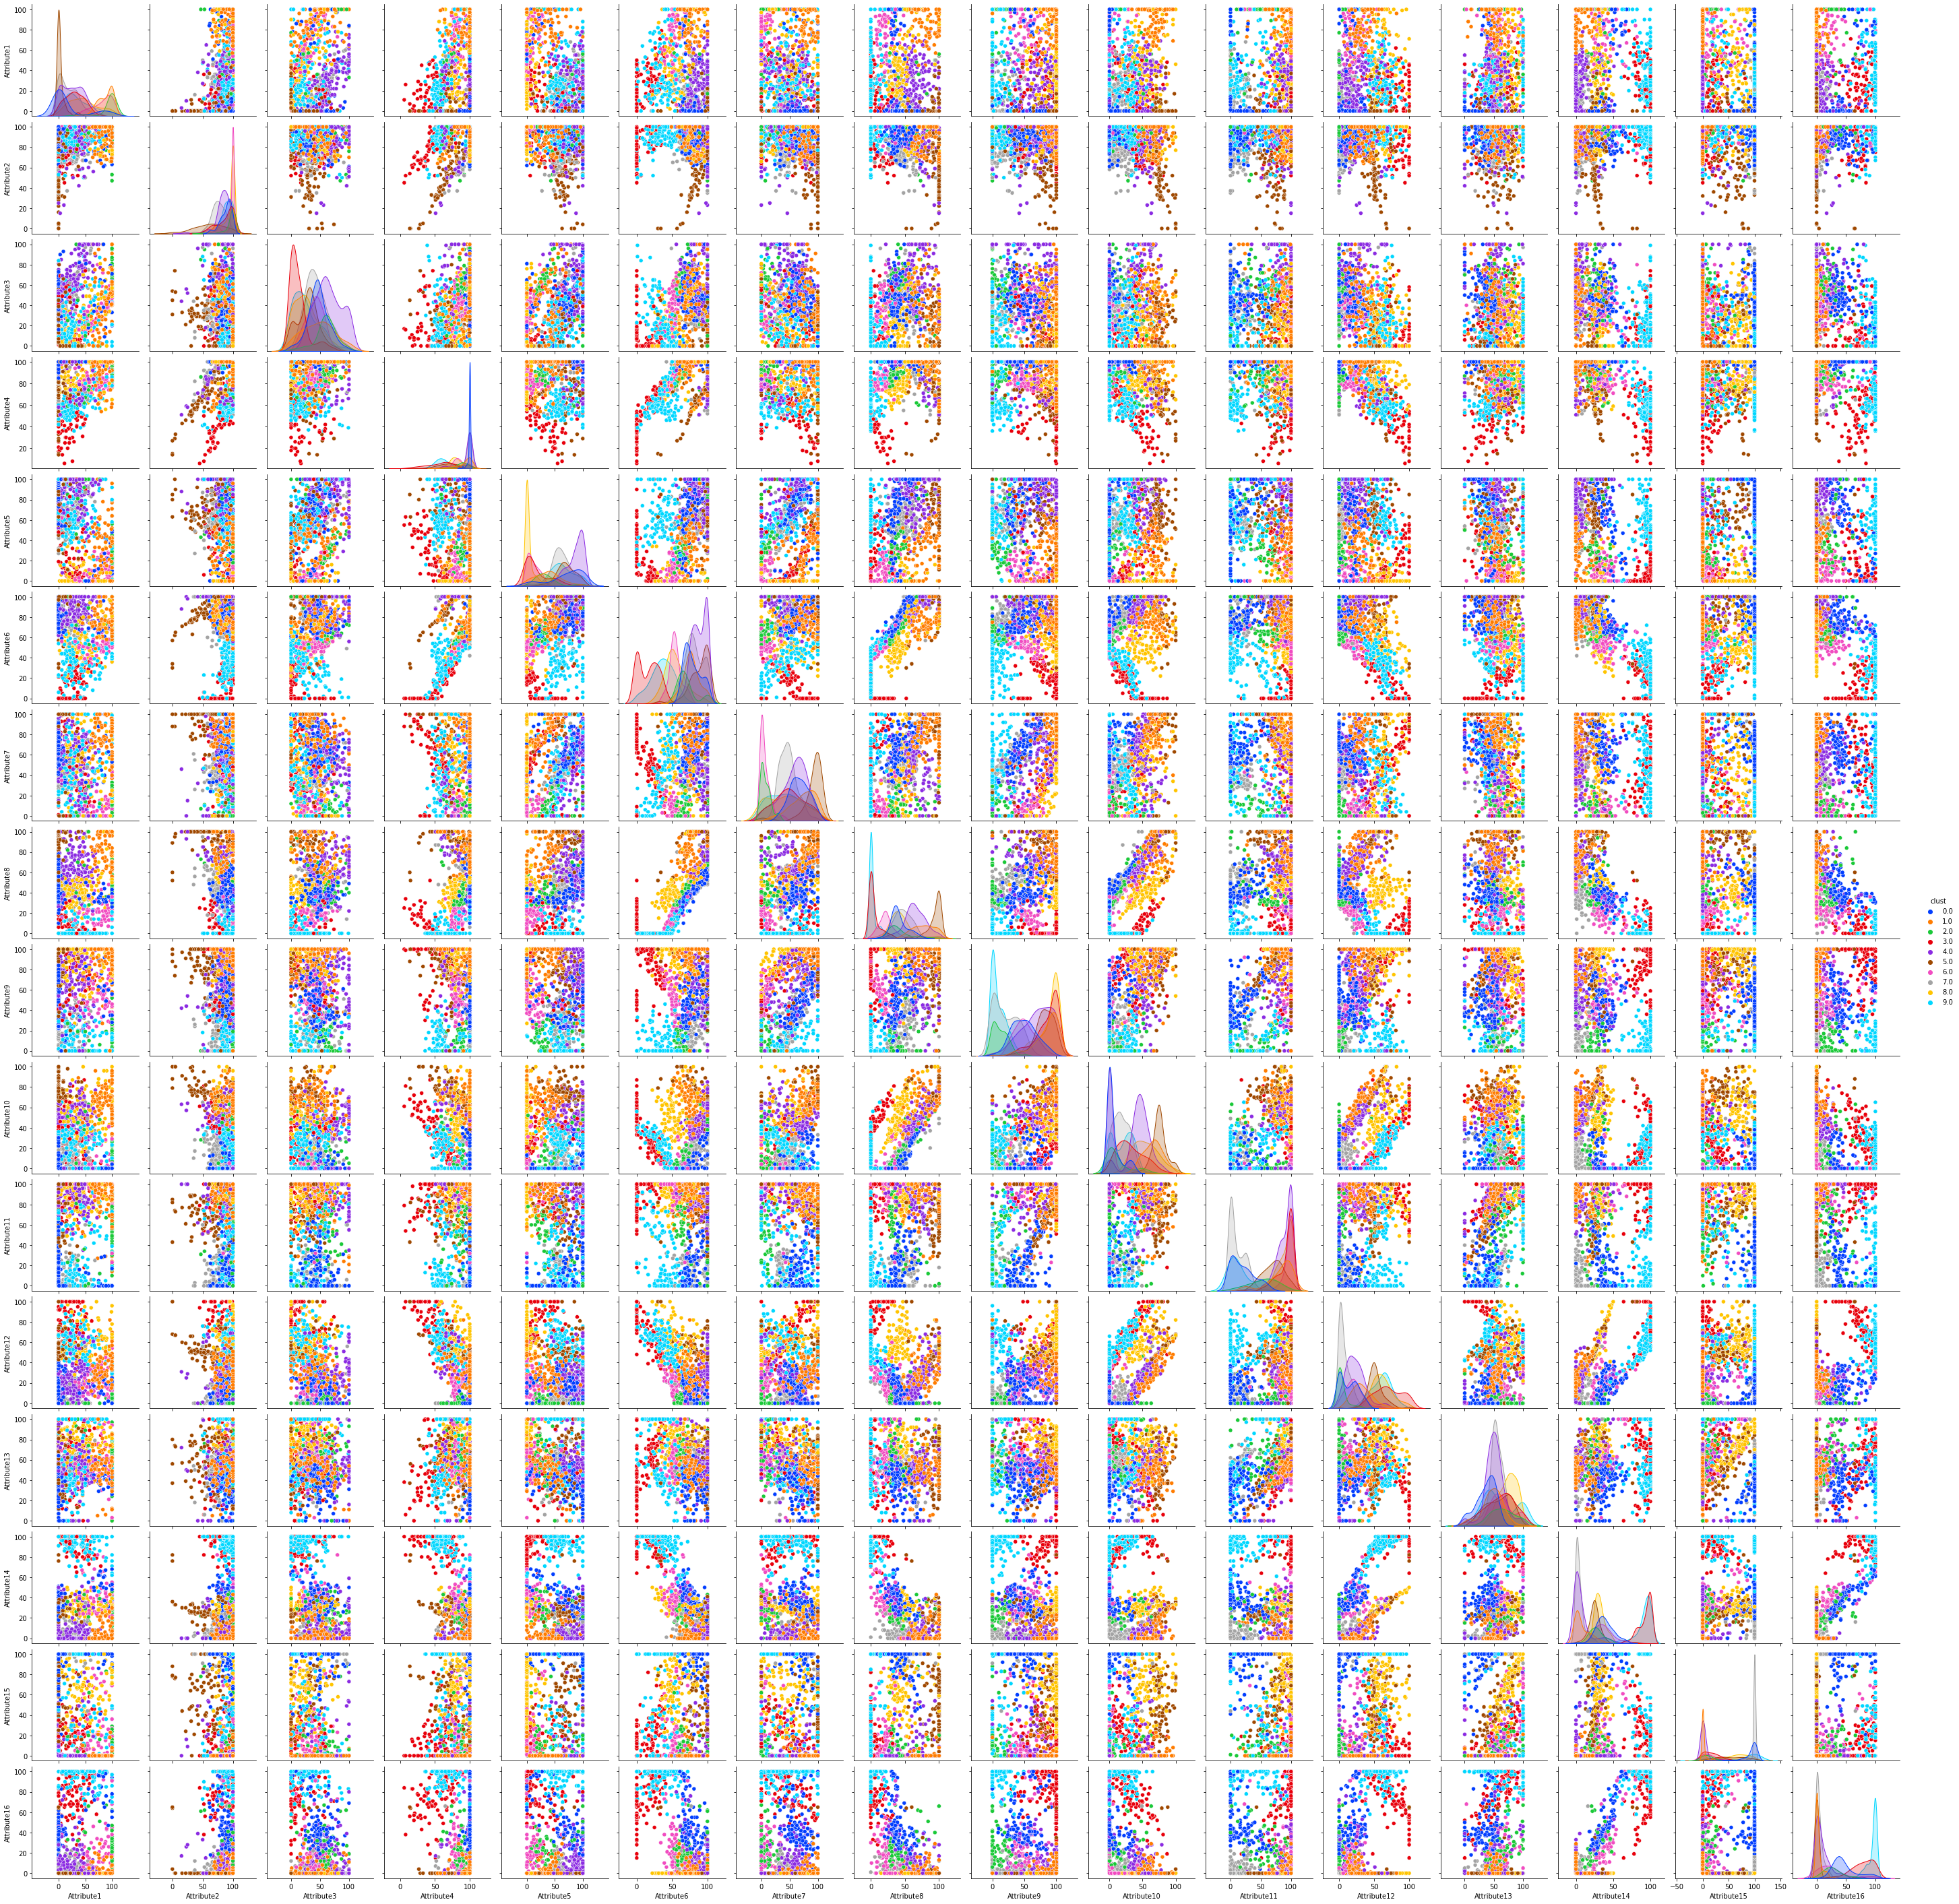

In [324]:
sns.pairplot(data_clustering, hue="clust", palette="bright")

# Cha

In [10]:
X_echantillon_CHA, Y_echantillon_CHA = echantillon(0.005,X,y)
X_echantillon_CHA

# Réindexer le DataFrame en partant de zéro -> Pour nos algos
X_echantillon_reset_CHA = X_echantillon_CHA.reset_index(drop=True)
Y_echantillon_reset_CHA = Y_echantillon_CHA.reset_index(drop=True)

nombre_pris= [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [11]:
X_echantillon_CHA

Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
9678          100          53          95          92          46         100   
3951           16         100           0          68          20          26   
9442           25         100           0          63           2          17   
4685           36          97           0          59           9          14   
9997           35         100           4          69           5          30   
818             0          55          53          77         100         100   
7251            0          54           0          72          42          90   
4560            0          41          73          63         100          87   
2816          100         100          89          94          89          79   
152             0          52          52          83          97         100   
6845           49         100          95          93          83          52   
8403           14          67          29         100          54          72   
8602            0          71          26         100          47          69   
2876           64          81          59         100         100          98   
7163           25          71          44         100          65          81   
8250           21          86          72         100          85          72   
3970           40          84          79         100         100          78   
7076           64          77          86         100         100          79   
9677           35          93          78         100          89          85   
9110           38         100          73          98          71          69   
6540           42         100          19          74           0          47   
10189          54         100           0          79          17          60   
3522           86         100          32          81           0          57   
5505           50         100          44          93          10          69   
178            30         100          16          84           0          51   
2563           36         100          23          78          57          38   
5642           14         100          75          97          74          99   
10473          33          86          21          56          91          44   
10577          19          91           9          66          63          43   
10682          63          86          32          66          58          32   
8271          100         100          63          87          35          68   
5380           81         100          46          75          19          49   
4023           75         100          30          89           1          51   
5369          100         100          58          95          20          71   
6560           93         100          48          89          12          59   
502             0          95          51         100          91          86   
9136            0          93          42         100          67          55   
2259            0         100          57          95          62          63   
7117            0          97          56         100          93          74   
6567            0          98          72         100          97          82   
6159           83         100           9          87          57          44   
1158            4          11          46          53          76         100   
5097           22          75          58          41          38           0   
10327          93         100          49          75          69          37   
2167           54          85          94         100          96          61   
5865           27          76          74          75         100         100   
5792          100          84          63         100          39          67   
10150          97          86          61         100          54          71   
4049           96         100         

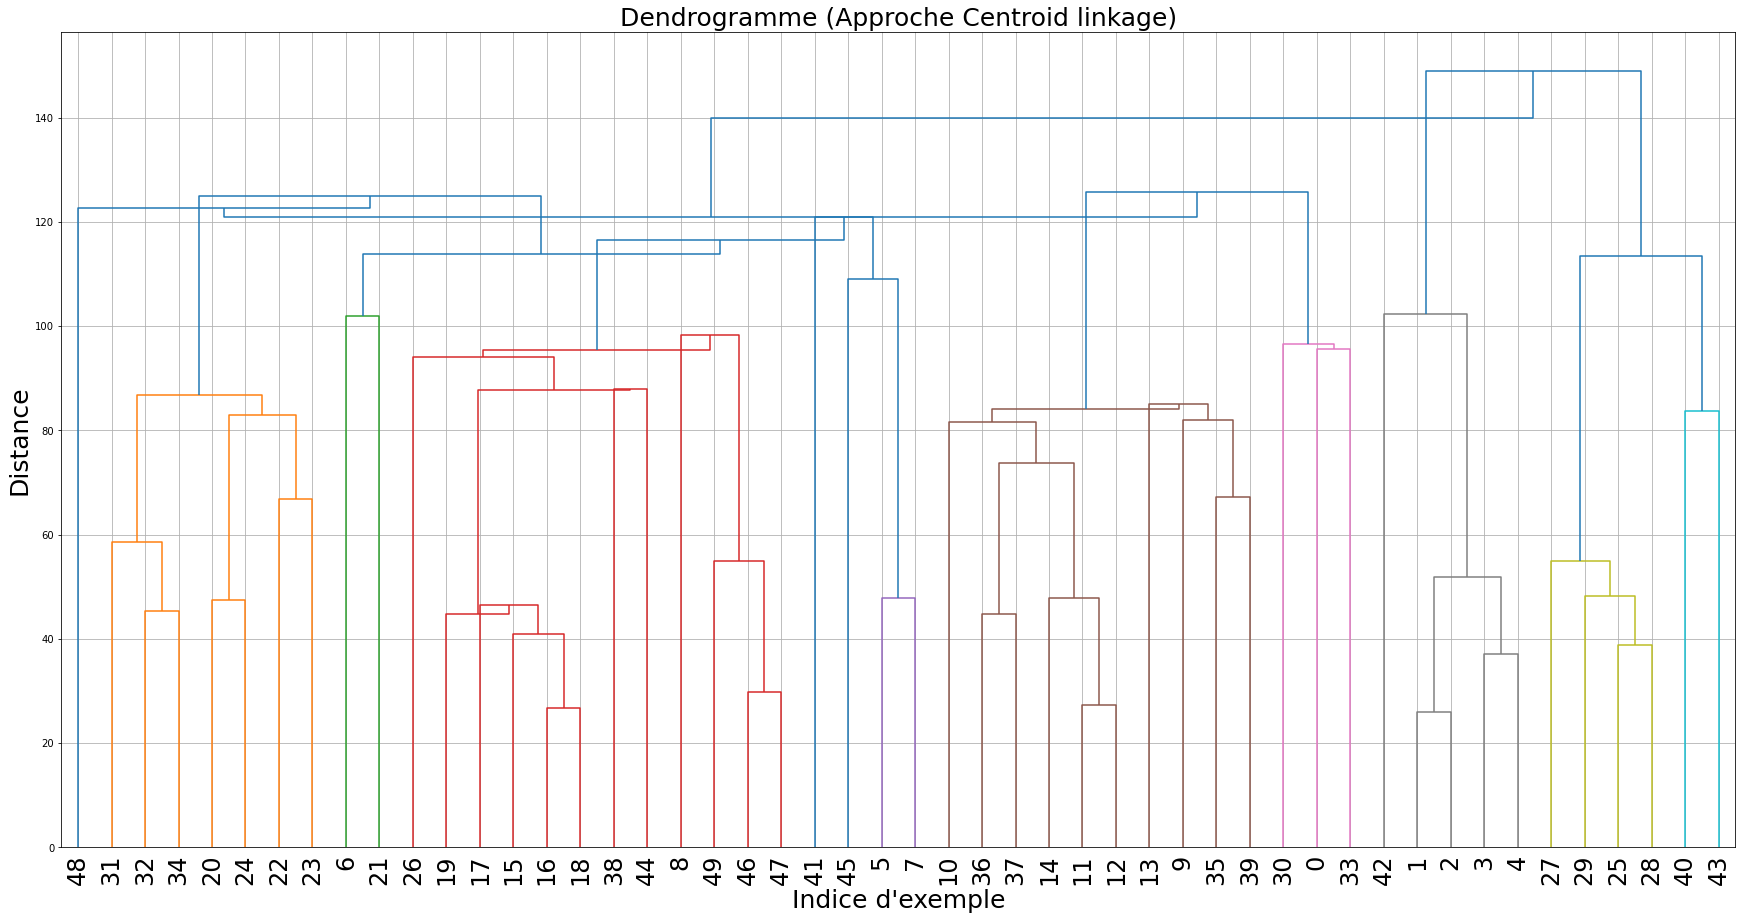

[[1, 2, 25.96150997149434, 2],
 [16, 18, 26.70205984563738, 2],
 [11, 12, 27.294688127912362, 2],
 [46, 47, 29.88310559496787, 2],
 [3, 4, 37.14835124201342, 2],
 [25, 28, 38.82009788756334, 2],
 [15, 51, 40.8319727664486, 3],
 [36, 37, 44.82186966202994, 2],
 [32, 34, 45.40925015897091, 2],
 [17, 56, 46.51881339845203, 4],
 [19, 59, 44.75768090506924, 5],
 [20, 24, 47.52893855326458, 2],
 [5, 7, 47.738873049120045, 2],
 [14, 52, 47.85655649960619, 3],
 [29, 55, 48.205290166121806, 3],
 [50, 54, 51.894122981316485, 4],
 [27, 64, 54.89181278761989, 4],
 [49, 53, 54.91129209916664, 3],
 [31, 58, 58.63019699779287, 3],
 [22, 23, 66.79820356865893, 2],
 [35, 39, 67.30527468185537, 2],
 [57, 63, 73.81376715912975, 5],
 [10, 71, 81.56347221642785, 6],
 [9, 70, 82.06399941509066, 3],
 [61, 69, 82.92014230571483, 4],
 [40, 43, 83.7137981458254, 2],
 [13, 73, 85.12996599970607, 4],
 [72, 76, 84.1755770860989, 10],
 [68, 74, 86.76000582705784, 7],
 [38, 44, 87.8521485223896, 2],
 [60, 79, 87.727

In [12]:
clust.CHA_centroid(X_echantillon_reset_CHA,verbose=False,dendrogramme=True)

On peut voir a travers ce dendrogrammes avec une coupure a distance d'environ 115 on obtient 10 clusters, dont certains possede beaucoup plus de descriptions

### Le poster

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données *Pen-Based Recognition of Handwritten Digits*, les résultats obtenus lors de l'apprentissage supervisé (études et résultats de votre TME-10) et lors de l'apprentissage non-supervisé (études et résultats de votre TME-11) ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.
